# Mounting Google Drive

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 1: Data Exploration and Preparation

Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Importing Data

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Project 7_Crop Production Analysis in India/Crop Production data.csv')

# Step 2: Data Visualization

Temporal Analysis:

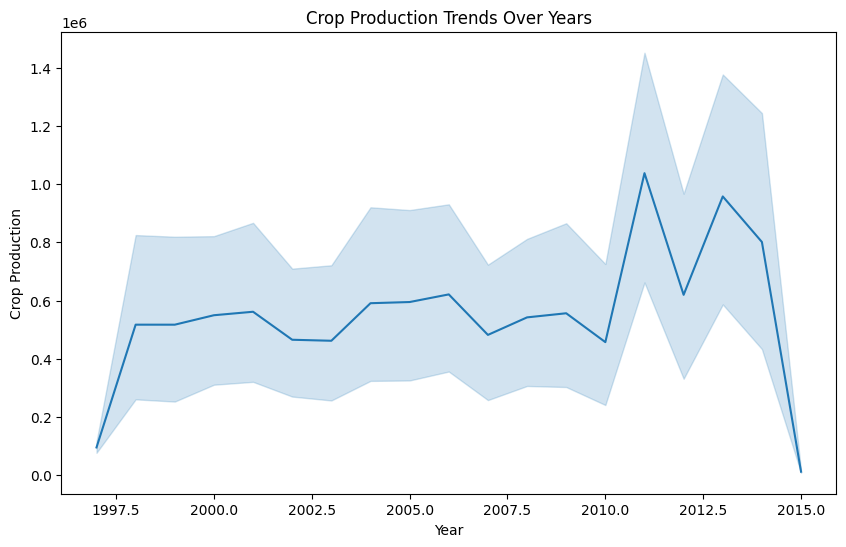

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot crop production trends over years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Crop_Year', y='Production', data=df)
plt.title('Crop Production Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Crop Production')
plt.show()

2. Spatial Analysis

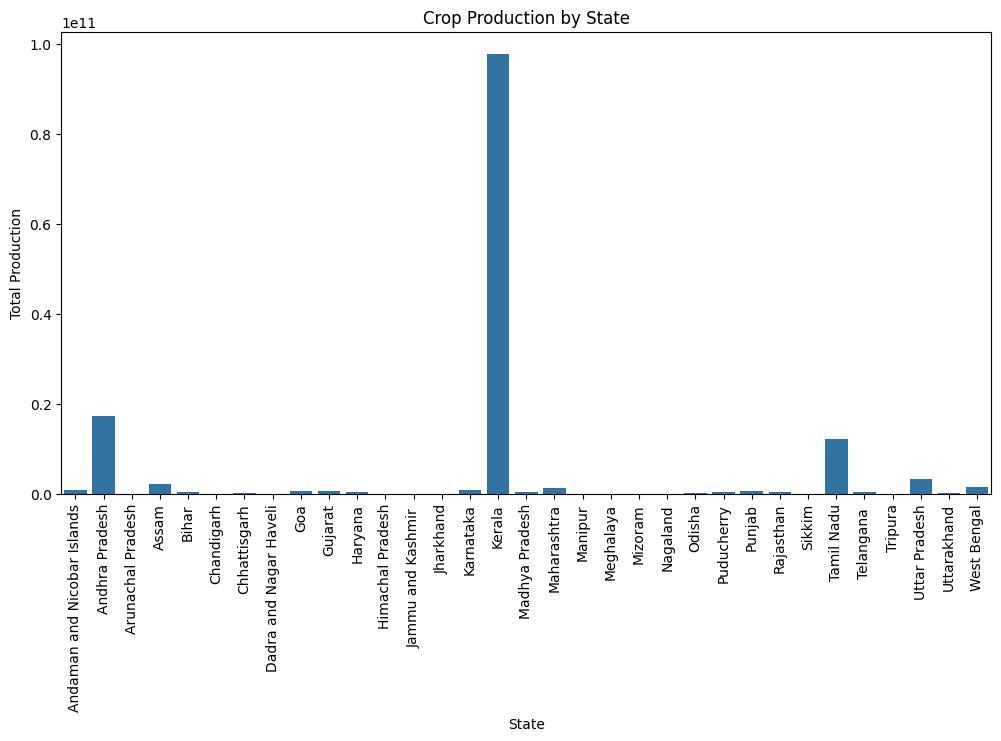

In [ ]:
# Aggregate production by state
state_production = df.groupby('State_Name')['Production'].sum().reset_index()

# Plot production by state
plt.figure(figsize=(12, 6))
sns.barplot(x='State_Name', y='Production', data=state_production)
plt.title('Crop Production by State')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.show()

# Step 3: Predictive Modeling

1. Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df.drop(['Production'], axis=1)  # Features
y = df['Production']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Train a Model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Project 7_Crop Production Analysis in India/Crop Production data.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['State_Name'] = le.fit_transform(df['State_Name'])
df['District_Name'] = le.fit_transform(df['District_Name'])
df['Season'] = le.fit_transform(df['Season'])
df['Crop'] = le.fit_transform(df['Crop'])

# Split data into features and target variable
X = df.drop(['Production'], axis=1)  # Features
y = df['Production']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor()

3. Evaluate the Model

In [ ]:
# Evaluate model
rf_score = rf_model.score(X_test, y_test)
print(f"Random Forest R2 Score: {rf_score}")

Random Forest R2 Score: 0.9102462708285152


# Creating Dashboard

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Project 7_Crop Production Analysis in India/Crop Production data.csv")

# Create the Dash application
app = dash.Dash("Project 7_Crop Production Analysis in India")

# Define visualizations
fig1 = px.line(df, x='Crop_Year', y='Production', color='Crop', title='Crop Production Over Time')

fig2 = px.bar(df.groupby('State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10),
              x='State_Name', y='Production', title='Top Crop Producers')

fig3 = px.pie(df, names='Crop', title='Crop Distribution')

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Crop Production Dashboard"),

    html.Div([
        dcc.Graph(id='crop-production-over-time', figure=fig1),
        dcc.Graph(id='top-crop-producers', figure=fig2),
        dcc.Graph(id='crop-distribution', figure=fig3)
    ])
])

# Run the app
if "Project 7_Crop Production Analysis in India" == "__main__":
    app.run_server(debug=True)

